Malaya provided basic interface for Pretrained Transformer encoder models, specific to Malay, local social media slang and Manglish language, we called it Transformer-Bahasa. This interface not able us to use it to do custom training.

If you want to download pretrained model for Transformer-Bahasa and use it for custom transfer-learning, you can download it here, https://github.com/huseinzol05/Malaya/tree/master/pretrained-model/, some notebooks to help you get started.

Or you can simply use [hugging-face transformers](https://huggingface.co/models?filter=malay) to try transformer models from Malaya, simply check available models from here, https://huggingface.co/models?filter=malay

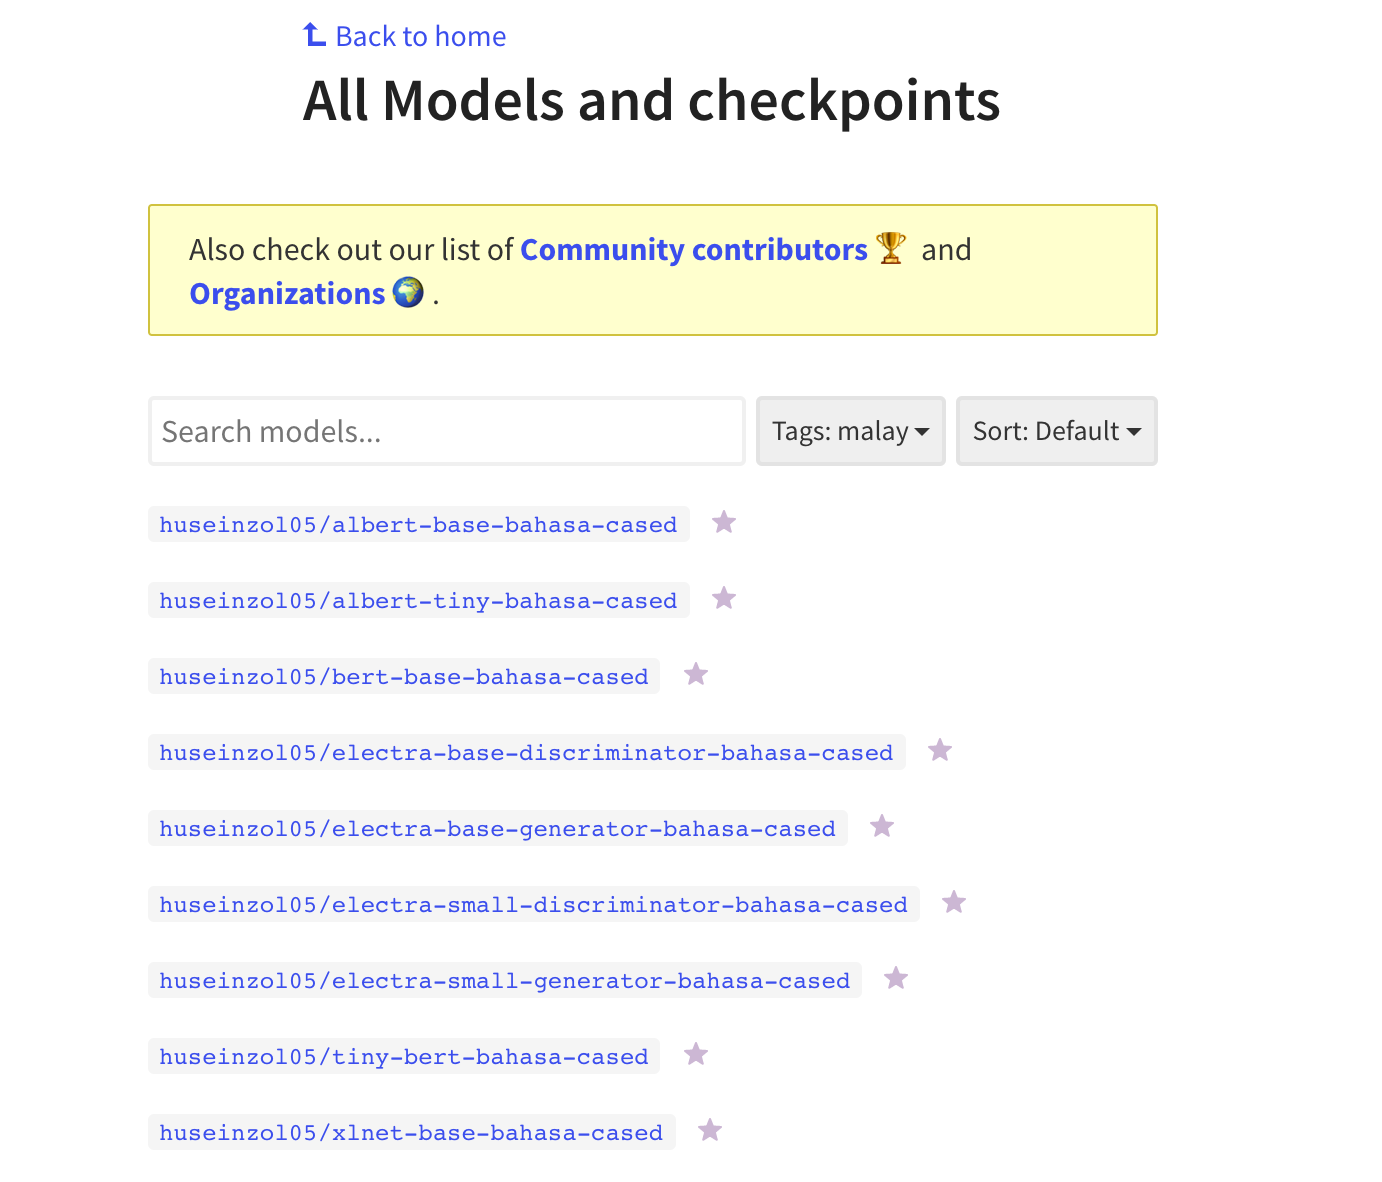

In [5]:
from IPython.core.display import Image, display

display(Image('huggingface.png', width=500))

In [1]:
%%time
import malaya

CPU times: user 4.36 s, sys: 866 ms, total: 5.23 s
Wall time: 4.33 s


## list Transformer-Bahasa available

In [2]:
malaya.transformer.available_model()

['bert',
 'tiny-bert',
 'albert',
 'tiny-albert',
 'xlnet',
 'alxlnet',
 'electra',
 'small-electra']

1. `bert` - BERT architecture from google.

2. `tiny-bert` - BERT architecture from google with smaller parameters.

3. `albert` - ALBERT architecture from google.

4. `tiny-albert` - ALBERT architecture from google with smaller parameters.

5. `xlnet` - XLNET architecture from google.

6. `alxlnet` Malaya architecture, unpublished model.

7. `electra` ELECTRA architecture from google.

8. `small-electra` ELECTRA architecture from google with smaller parameters.

In [3]:
strings = ['Kerajaan galakkan rakyat naik public transport tapi parking kat lrt ada 15. Reserved utk staff rapid je dah berpuluh. Park kereta tepi jalan kang kene saman dgn majlis perbandaran. Kereta pulak senang kene curi. Cctv pun tak ada. Naik grab dah 5-10 ringgit tiap hari. Gampang juga',
           'Alaa Tun lek ahhh npe muka masam cmni kn agong kata usaha kerajaan terdahulu sejak selepas merdeka',
           "Orang ramai cakap nurse kerajaan garang. So i tell u this. Most of our local ppl will treat us as hamba abdi and they don't respect us as a nurse"]

## Load XLNET-Bahasa

In [4]:
xlnet = malaya.transformer.load(model = 'xlnet')

INFO:tensorflow:memory input None
INFO:tensorflow:Use float type <dtype: 'float32'>
INFO:tensorflow:Restoring parameters from /Users/huseinzolkepli/Malaya/xlnet-model/base/xlnet-base/model.ckpt


I have random sentences copied from Twitter, searched using `kerajaan` keyword.

#### Vectorization

Change a string or batch of strings to latent space / vectors representation.

In [6]:
v = xlnet.vectorize(strings)
v.shape

(3, 768)

#### Attention

Attention is to get which part of the sentence give the impact. Method available for attention,

- `'last'` - attention from last layer.
- `'first'` - attention from first layer.
- `'mean'` - average attentions from all layers.

You can give list of strings or a string to get the attention, in this documentation, I just want to use a string.

In [8]:
xlnet.attention([strings[1]], method = 'last')

[[('Alaa', 0.062061824),
  ('Tun', 0.051056776),
  ('lek', 0.13115405),
  ('ahhh', 0.08195943),
  ('npe', 0.06210695),
  ('muka', 0.04706182),
  ('masam', 0.058289353),
  ('cmni', 0.026094284),
  ('kn', 0.056146827),
  ('agong', 0.033949938),
  ('kata', 0.052644122),
  ('usaha', 0.07063393),
  ('kerajaan', 0.046773836),
  ('terdahulu', 0.057166394),
  ('sejak', 0.045712817),
  ('selepas', 0.047048207),
  ('merdeka', 0.07013944)]]

In [9]:
xlnet.attention([strings[1]], method = 'first')

[[('Alaa', 0.045956098),
  ('Tun', 0.040094823),
  ('lek', 0.0611072),
  ('ahhh', 0.07029096),
  ('npe', 0.048513662),
  ('muka', 0.056670234),
  ('masam', 0.04088071),
  ('cmni', 0.08728454),
  ('kn', 0.047778472),
  ('agong', 0.081243224),
  ('kata', 0.03866041),
  ('usaha', 0.058326427),
  ('kerajaan', 0.055446573),
  ('terdahulu', 0.077162124),
  ('sejak', 0.05951431),
  ('selepas', 0.05385498),
  ('merdeka', 0.07721528)]]

In [10]:
xlnet.attention([strings[1]], method = 'mean')

[[('Alaa', 0.06978634),
  ('Tun', 0.0517442),
  ('lek', 0.059642658),
  ('ahhh', 0.055883657),
  ('npe', 0.05339206),
  ('muka', 0.06806306),
  ('masam', 0.0489921),
  ('cmni', 0.0698193),
  ('kn', 0.057752036),
  ('agong', 0.065566674),
  ('kata', 0.059152905),
  ('usaha', 0.063305095),
  ('kerajaan', 0.050608452),
  ('terdahulu', 0.05888331),
  ('sejak', 0.057429556),
  ('selepas', 0.042058233),
  ('merdeka', 0.067920305)]]

#### Visualize Attention

Before using attention visualization, we need to load D3 into our jupyter notebook first. This visualization borrow from https://github.com/jessevig/bertviz .

In [11]:
%%javascript
require.config({
  paths: {
      d3: '//cdnjs.cloudflare.com/ajax/libs/d3/3.4.8/d3.min',
      jquery: '//ajax.googleapis.com/ajax/libs/jquery/2.0.0/jquery.min',
  }
});

<IPython.core.display.Javascript object>

In [12]:
xlnet.visualize_attention('nak makan ayam dgn husein')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

_I attached a printscreen, readthedocs cannot visualize the javascript._

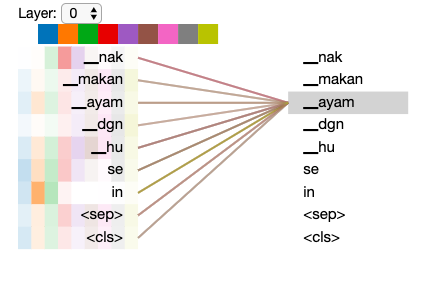

In [13]:
from IPython.core.display import Image, display

display(Image('xlnet-attention.png', width=300))

**All attention models able to use these interfaces.**

## Load ELECTRA-Bahasa

Feel free to use another models.

In [4]:
electra = malaya.transformer.load(model = 'electra')


Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.random.categorical` instead.






INFO:tensorflow:Restoring parameters from /Users/huseinzolkepli/Malaya/electra-model/base/electra-base/model.ckpt


In [14]:
electra.attention([strings[1]], method = 'last')

[[('Alaa', 0.059817147),
  ('Tun', 0.075028375),
  ('lek', 0.057848394),
  ('ahhh', 0.046973262),
  ('npe', 0.05160833),
  ('muka', 0.06221234),
  ('masam', 0.058585588),
  ('cmni', 0.054711323),
  ('kn', 0.06741887),
  ('agong', 0.056326747),
  ('kata', 0.054182768),
  ('usaha', 0.07986903),
  ('kerajaan', 0.05559596),
  ('terdahulu', 0.052879248),
  ('sejak', 0.049992196),
  ('selepas', 0.053916205),
  ('merdeka', 0.06303418)]]